In [50]:
import altair as alt
import pandas as pd
import numpy as np
alt.data_transformers.enable('data_server')
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

In [28]:
data = pd.read_csv('crime.csv')
data.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude
0,Other Theft,2003,5,12,16.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
1,Other Theft,2003,5,7,15.0,20.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
2,Other Theft,2003,4,23,16.0,40.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
3,Other Theft,2003,4,20,11.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
4,Other Theft,2003,4,12,17.0,45.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763


In [34]:
print(f"The Dataset has {data.shape[0]} rows and {data.shape[1]} variables ")

The Dataset has 530652 rows and 12 variables 


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530652 entries, 0 to 530651
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TYPE           530652 non-null  object 
 1   YEAR           530652 non-null  int64  
 2   MONTH          530652 non-null  int64  
 3   DAY            530652 non-null  int64  
 4   HOUR           476290 non-null  float64
 5   MINUTE         476290 non-null  float64
 6   HUNDRED_BLOCK  530639 non-null  object 
 7   NEIGHBOURHOOD  474028 non-null  object 
 8   X              530652 non-null  float64
 9   Y              530652 non-null  float64
 10  Latitude       530652 non-null  float64
 11  Longitude      530652 non-null  float64
dtypes: float64(6), int64(3), object(3)
memory usage: 48.6+ MB


In [35]:
print('Missing values for HOUR, MINUTE, HUNDRED_BLOCK, NEIGHBORHOOD')

Missing values for HOUR, MINUTE, HUNDRED_BLOCK, NEIGHBORHOOD


In [41]:
print(f"Vancouver has {data['NEIGHBOURHOOD'].nunique()} neighborhoods")

Vancouver has 24 neighborhoods


In [38]:
data['NEIGHBOURHOOD'].unique()

array(['Strathcona', 'Kerrisdale', 'Dunbar-Southlands',
       'Grandview-Woodland', 'Sunset', 'West End', nan,
       'Central Business District', 'Hastings-Sunrise',
       'Victoria-Fraserview', 'Fairview', 'Kensington-Cedar Cottage',
       'West Point Grey', 'Shaughnessy', 'Renfrew-Collingwood',
       'Killarney', 'Riley Park', 'Arbutus Ridge', 'Musqueam',
       'Mount Pleasant', 'Kitsilano', 'Stanley Park', 'South Cambie',
       'Marpole', 'Oakridge'], dtype=object)

In [47]:
print(f"dataset has information for {data['YEAR'].nunique()} years. From {data['YEAR'].unique().min()} to {data['YEAR'].unique().max()}")

dataset has information for 15 years. From 2003 to 2017


In [54]:
numerics = data.select_dtypes(include=np.number).columns.tolist()

data[numerics].describe()

,YEAR,MONTH,DAY,HOUR,MINUTE,X,Y,Latitude,Longitude
count,530652.000000,530652.000000,530652.000000,476290.000000,476290.000000,530652.000000,5.306520e+05,530652.000000,530652.000000
mean,2009.197956,6.450597,15.408590,13.711254,16.940039,441802.149909,4.897663e+06,44.216029,-110.495297
std,4.386272,3.399212,8.750642,6.767744,18.418950,149281.547656,1.654633e+06,14.938004,37.329862
min,2003.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-124.549757
25%,2005.000000,4.000000,8.000000,9.000000,0.000000,489944.452500,5.453651e+06,49.235573,-123.127194
50%,2009.000000,6.000000,15.000000,15.000000,10.000000,491499.240000,5.456840e+06,49.264251,-123.107128
75%,2013.000000,9.000000,23.000000,19.000000,30.000000,493547.210000,5.458638e+06,49.280441,-123.065932
max,2017.000000,12.000000,31.000000,23.000000,59.000000,511303.000000,5.512579e+06,49.755314,0.000000


In [55]:
print('We need data preproccessing')

We need data preproccessing


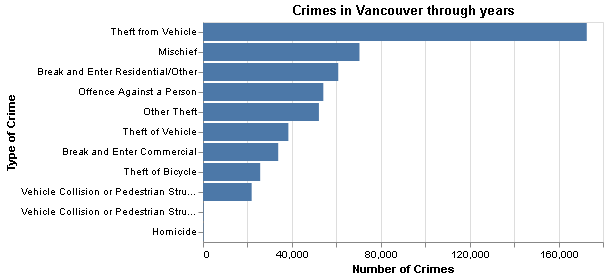

In [68]:
alt.Chart(data, title='Crimes in Vancouver through years').mark_bar().encode(
    y=alt.Y('TYPE', sort='-x', title='Type of Crime'),
    x=alt.X('count()', title='Number of Crimes'))

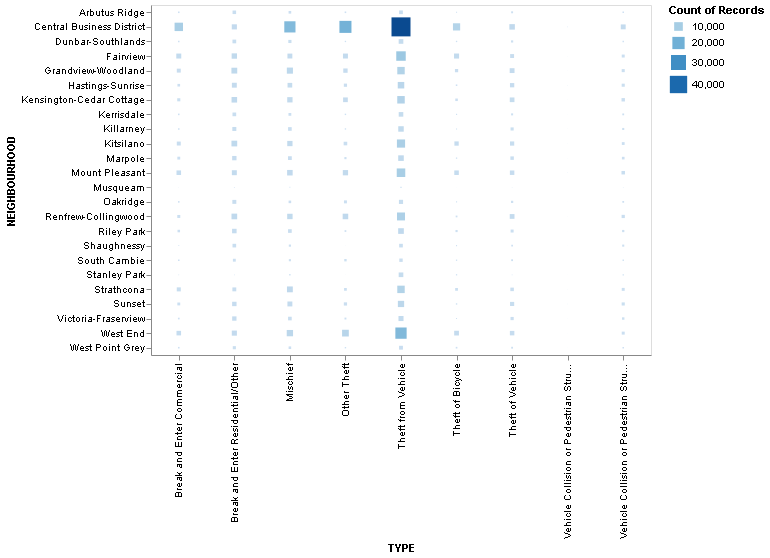

In [74]:
alt.Chart(data.dropna()).mark_square().encode(
    x='TYPE',
    y='NEIGHBOURHOOD',
    color='count()',
    size='count()').properties(
    width=500,
    height=350
)

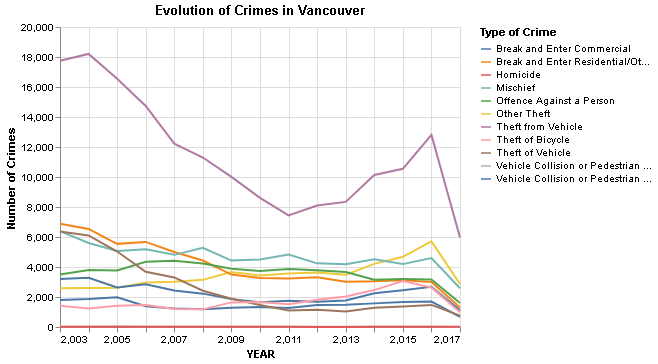

In [85]:
alt.Chart(data,title ='Evolution of Crimes in Vancouver').mark_line().encode(
    x=alt.X('YEAR'),
    y=alt.Y('count(YEAR)', title ='Number of Crimes'),
    color=alt.Color('TYPE', title='Type of Crime'))

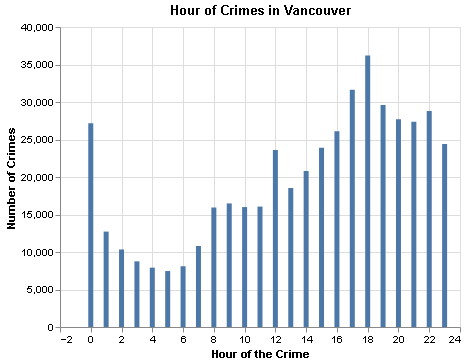

In [96]:
alt.Chart(data, title='Hour of Crimes in Vancouver').mark_bar(clip=True).encode(
    x=alt.X('HOUR', title='Hour of the Crime', scale=alt.Scale(domain=(0, 23))),
    y=alt.Y('count()', title='Number of Crimes'))

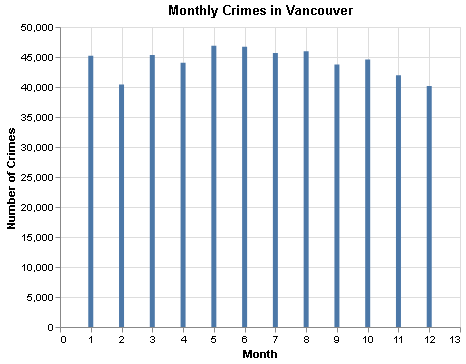

In [98]:
alt.Chart(data, title='Monthly Crimes in Vancouver').mark_bar(clip=True).encode(
    x=alt.X('MONTH', title='Month'),
    y=alt.Y('count()', title='Number of Crimes'))

In [101]:
data['HUNDRED_BLOCK'].nunique()

21204